# Космический корабль Титаник

In [1]:
!pip install tensorflow_decision_forests

import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 63.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
  Attempting uninstal

## EDA

In [8]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [9]:
num_rows_tr = len(train_data)
num_rows_ts = len(test_data)
num_rows_tr, num_rows_ts

(8693, 4277)

In [10]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


*Стандартное отклонение для признаков RoomService, FoodCourt, ShoppingMall, Spa и VRDeck значительно выше среднего значения в обоих наборах данных (особенно в тренировочном). Это говорит о большом разбросе значений в этих признаках, что может указывать на наличие выбросов или мультимодальное распределение.*

*Средние значения RoomService и FoodCourt в train и test наборах существенно отличаются (224.69 и 458.08 в train против 219.27 и 439.48 в test, соответственно), как и их стандартные отклонения. Это может указывать на разное распределение этих признаков в выборках, что может ухудшить обобщающую способность модели, обученной на train.*

*Признак Age имеет более устойчивую статистику. Средние и стандартные отклонения этого признака достаточно близки в обоих наборах данных. Кроме того, 25%, 50% и 75% квантили также очень похожи.*

#### Анализ пропусков

In [24]:
def analyze_missing_values(data, dataset_name):

  null_counts = data.isnull().sum()
  null_percentages = (null_counts / len(data)) * 100

  missing_info = pd.DataFrame({'Количество пропущенных значений': null_counts,
                                'Процент пропущенных значений': null_percentages})

  print(f"\nАнализ пропущенных значений в {dataset_name}\n")
  print(missing_info)

analyze_missing_values(train_data, "тренировочном наборе данных")
analyze_missing_values(test_data, "тестовом наборе данных")


Анализ пропущенных значений в тренировочном наборе данных

              Количество пропущенных значений  Процент пропущенных значений
PassengerId                                 0                      0.000000
HomePlanet                                201                      2.312205
CryoSleep                                 217                      2.496261
Cabin                                     199                      2.289198
Destination                               182                      2.093639
Age                                       179                      2.059128
VIP                                       203                      2.335212
RoomService                               181                      2.082135
FoodCourt                                 183                      2.105142
ShoppingMall                              208                      2.392730
Spa                                       183                      2.105142
VRDeck                      

<Axes: >

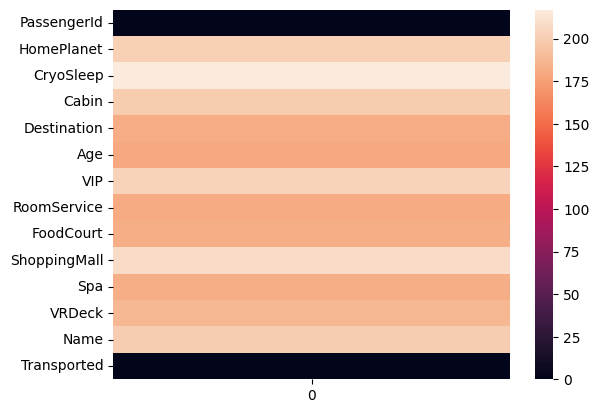

In [31]:
sns.heatmap(train_data.isnull().sum().to_frame())

Пропуски равномерно распределены между train и test. Процент пропусков для каждого признака относительно невелик (всегда меньше 2.5%).


Учитывая небольшой процент пропусков и потенциальную ценность информации используем одну из стратегий заполнения пропусков:

1.  Категориальные признаки:

    •   HomePlanet, CryoSleep, Destination, VIP - так как это категориальные признаки, лучше заполнить пропуски самым часто встречающимся значением (модой).
    •   Cabin - структура записи в столбце позволяет разделить его на несколько компонентов.

2.  Числовые признаки:

    •   Age - Заполнение медианным значением более устойчиво к выбросам, чем заполнение средним.
    •   RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Посмотрим, связаны ли пропуски с тем, что пассажир просто не пользовался этими услугами. Если это так, заполнение нулями может быть логичным. В противном случае — заполнение медианой.
    •   Name - Этот столбец, скорее всего, не повлияет на результат обучения модели. Можно заполнить пропуски в столбце Name значением 'Unknown'.


#### Работа с пропущенными значениями

In [39]:
# Создаем новые столбцы, заполняя их значениями по умолчанию

train_data['CabinDeck'] = train_data['Cabin'].apply(lambda x: x.split('/')[0] if isinstance(x, str) else 'Unknown')
train_data['CabinNum'] = train_data['Cabin'].apply(lambda x: x.split('/')[1] if isinstance(x, str) else -1).astype(int) # Используем -1 для числовых пропусков
train_data['CabinSide'] = train_data['Cabin'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else 'Unknown')

test_data['CabinDeck'] = test_data['Cabin'].apply(lambda x: x.split('/')[0] if isinstance(x, str) else 'Unknown')
test_data['CabinNum'] = test_data['Cabin'].apply(lambda x: x.split('/')[1] if isinstance(x, str) else -1).astype(int)
test_data['CabinSide'] = test_data['Cabin'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else 'Unknown')

In [40]:
# CabinDeck
mode_deck = train_data['CabinDeck'].mode()[0]
train_data['CabinDeck'].fillna(mode_deck, inplace=True)
test_data['CabinDeck'].fillna(mode_deck, inplace=True)

# CabinNum
median_num = train_data['CabinNum'].median()
train_data['CabinNum'].fillna(median_num, inplace=True)
test_data['CabinNum'].fillna(median_num, inplace=True)

# CabinSide
mode_side = train_data['CabinSide'].mode()[0]
train_data['CabinSide'].fillna(mode_side, inplace=True)
test_data['CabinSide'].fillna(mode_side, inplace=True)

<ipython-input-40-71f646c269d1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['CabinDeck'].fillna(mode_deck, inplace=True)
<ipython-input-40-71f646c269d1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [41]:
train_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [42]:
test_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNum,CabinSide
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


#### <Нужно остальное доделать по пропускам>

#### Transported в Тренировочном наборе данных


Распределение 'Transported' в 'Тренировочный набор данных':
Transported
True    50.36%
False   49.64%


<ipython-input-27-7932bbe2390f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=target_variable, data=data, palette=[PRIMARY_COLOR])
<ipython-input-27-7932bbe2390f>:12: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=target_variable, data=data, palette=[PRIMARY_COLOR])


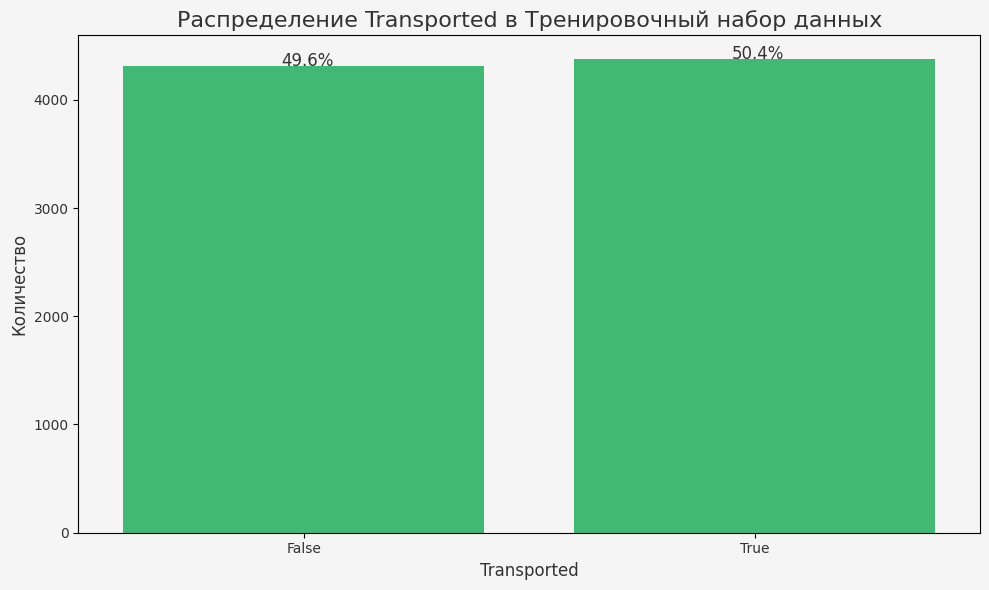

In [27]:
PRIMARY_COLOR = '#2ecc71'
BG_COLOR = '#f5f5f5'
TEXT_COLOR = '#333333'

def show_target_distribution(data, target_variable, dataset_name):
    distribution = data[target_variable].value_counts(normalize=True) * 100

    print(f"\nРаспределение '{target_variable}' в '{dataset_name}':")
    print(distribution.to_string(float_format='{:.2f}%'.format))

    plt.figure(figsize=(10, 6), facecolor=BG_COLOR)
    ax = sns.countplot(x=target_variable, data=data, palette=[PRIMARY_COLOR])
    ax.set_facecolor(BG_COLOR)

    plt.title(f'Распределение {target_variable} в {dataset_name}', color=TEXT_COLOR, fontsize=16)
    plt.ylabel('Количество', color=TEXT_COLOR, fontsize=12)
    plt.xlabel(target_variable, color=TEXT_COLOR, fontsize=12)
    plt.xticks(color=TEXT_COLOR)
    plt.yticks(color=TEXT_COLOR)

    total_count = len(data)
    for patch in ax.patches:
        percentage = '{:.1f}%'.format(100 * patch.get_height() / total_count)
        x_coord = patch.get_x() + patch.get_width()/2 - 0.05
        y_coord = patch.get_y() + patch.get_height()
        ax.text(x_coord, y_coord, percentage, size=12, color=TEXT_COLOR)

    plt.tight_layout()
    plt.show()


show_target_distribution(train_data, 'Transported', "Тренировочный набор данных")

#### Категориальные переменные

<ipython-input-29-e6eeb7efa3ad>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_means.index, y=category_means.values,


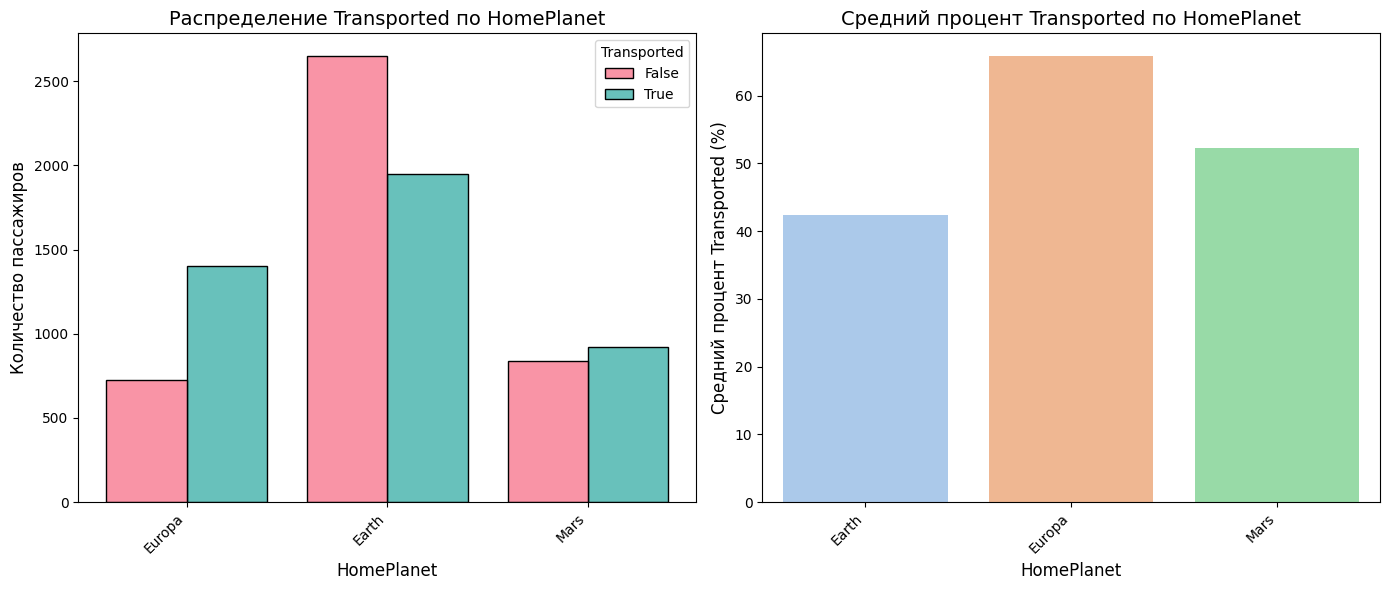

<ipython-input-29-e6eeb7efa3ad>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_means.index, y=category_means.values,


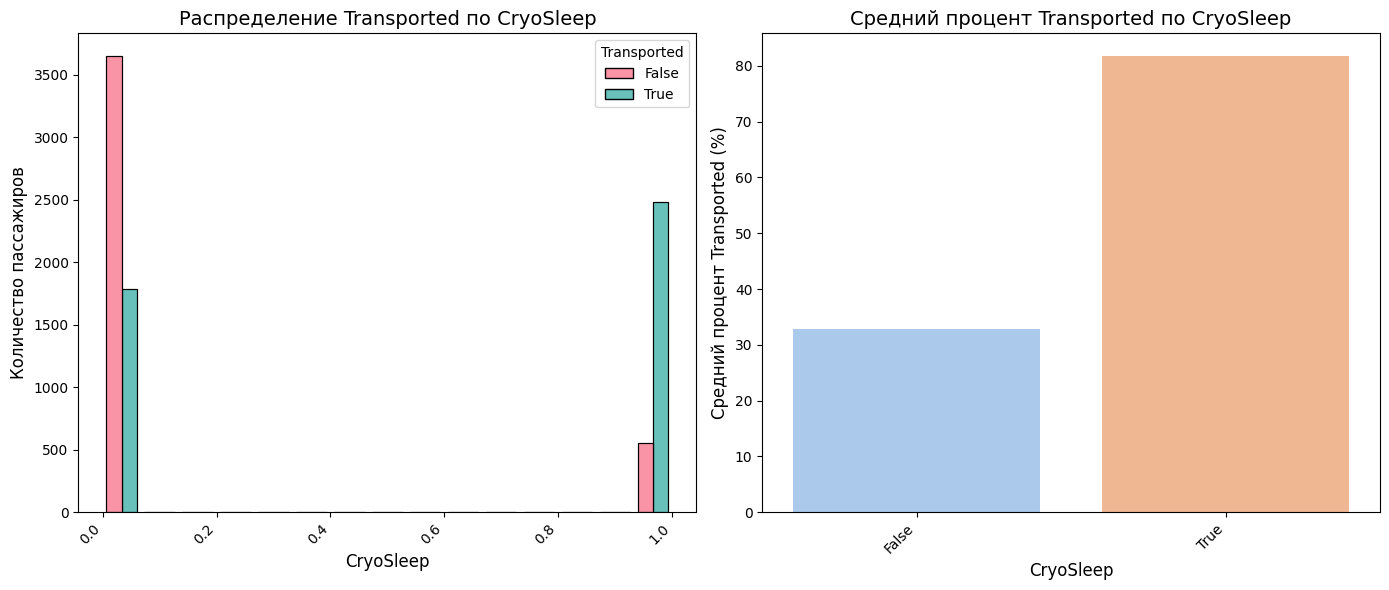

<ipython-input-29-e6eeb7efa3ad>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_means.index, y=category_means.values,


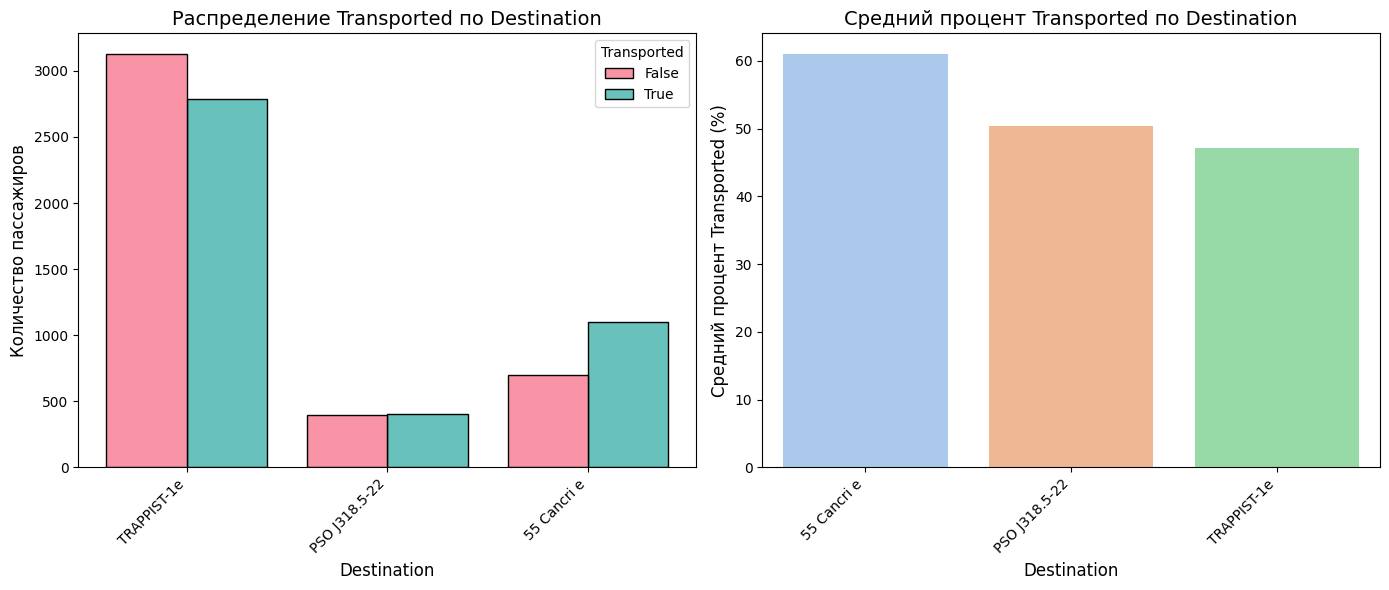

<ipython-input-29-e6eeb7efa3ad>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_means.index, y=category_means.values,


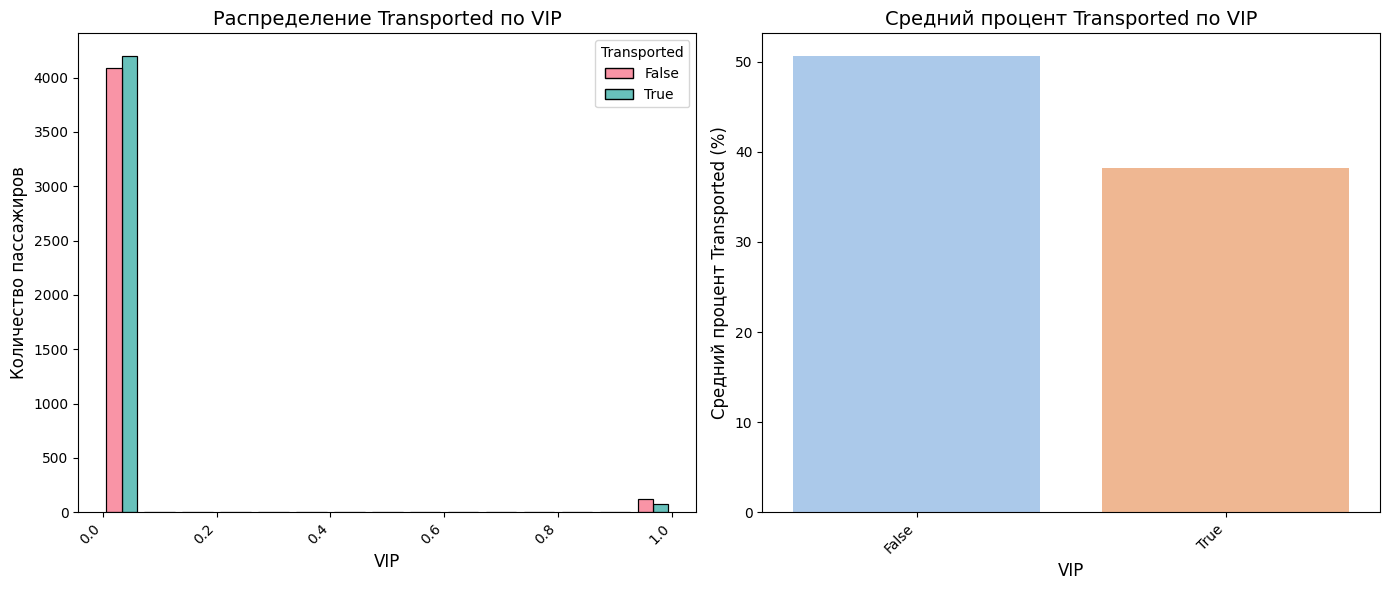

In [29]:
def explore_categorical_relationship(data, category_list, target_variable):

    for category in category_list:
        plt.figure(figsize=(14, 6))

        plt.subplot(1, 2, 1)
        sns.histplot(data=data, x=category, hue=target_variable, multiple="dodge", shrink=0.8,
                     palette="husl")
        plt.title(f'Распределение {target_variable} по {category}', fontsize=14)
        plt.xlabel(category, fontsize=12)
        plt.ylabel('Количество пассажиров', fontsize=12)
        plt.xticks(rotation=45, ha='right')

        plt.subplot(1, 2, 2)
        category_means = data.groupby(category)[target_variable].mean() * 100
        sns.barplot(x=category_means.index, y=category_means.values,
                    palette="pastel")
        plt.title(f'Средний процент {target_variable} по {category}', fontsize=14)
        plt.xlabel(category, fontsize=12)
        plt.ylabel(f'Средний процент {target_variable} (%)', fontsize=12)
        plt.xticks(rotation=45, ha='right')

        plt.tight_layout()
        plt.show()

categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
explore_categorical_relationship(train_data, categorical_features, 'Transported')

#### Непрерывные числовые признаки

<ipython-input-30-5407c6dea9a5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x=target_variable, y=feature, data=dataframe, palette="viridis")


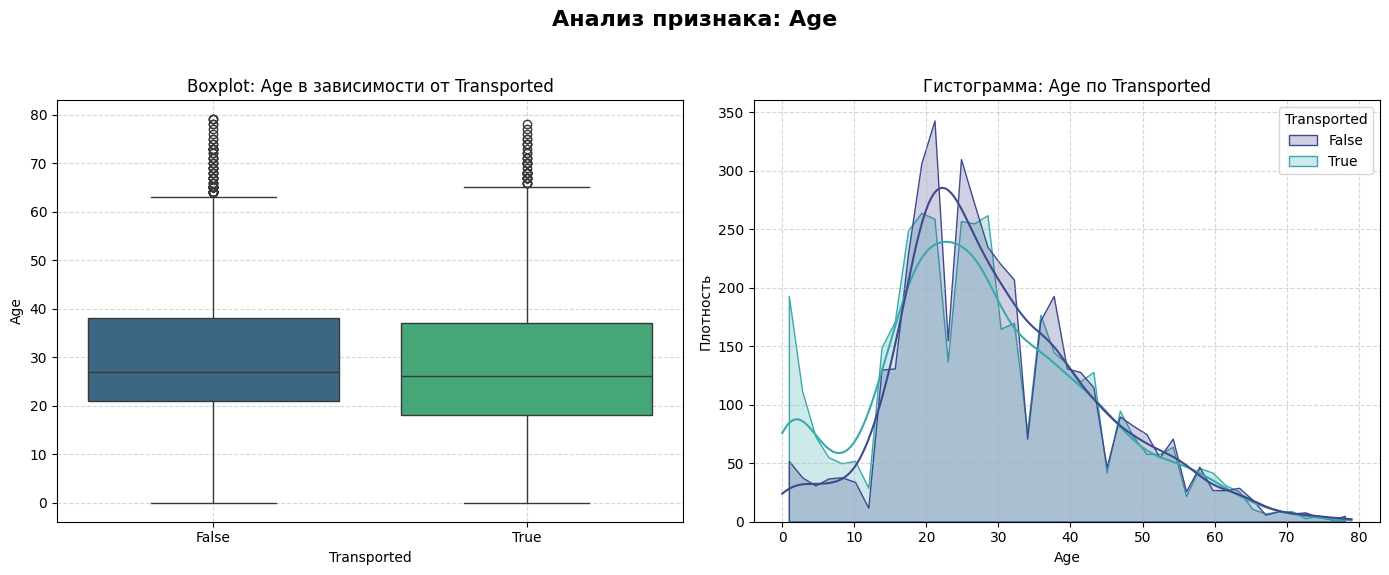

<ipython-input-30-5407c6dea9a5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x=target_variable, y=feature, data=dataframe, palette="viridis")


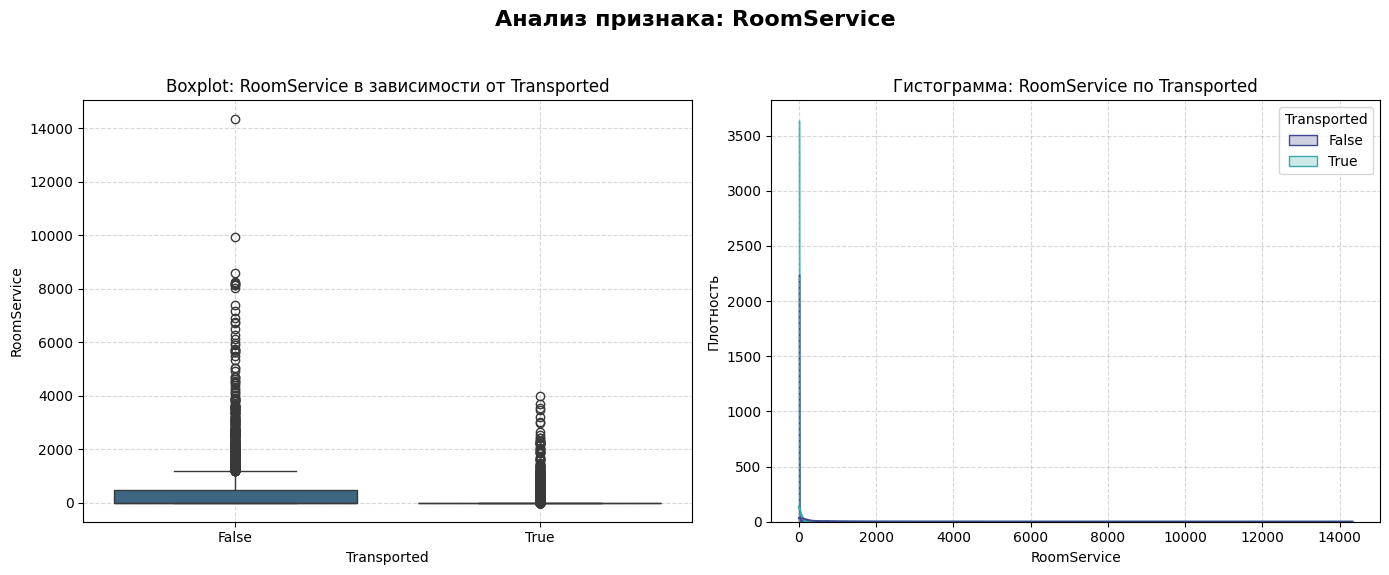

<ipython-input-30-5407c6dea9a5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x=target_variable, y=feature, data=dataframe, palette="viridis")


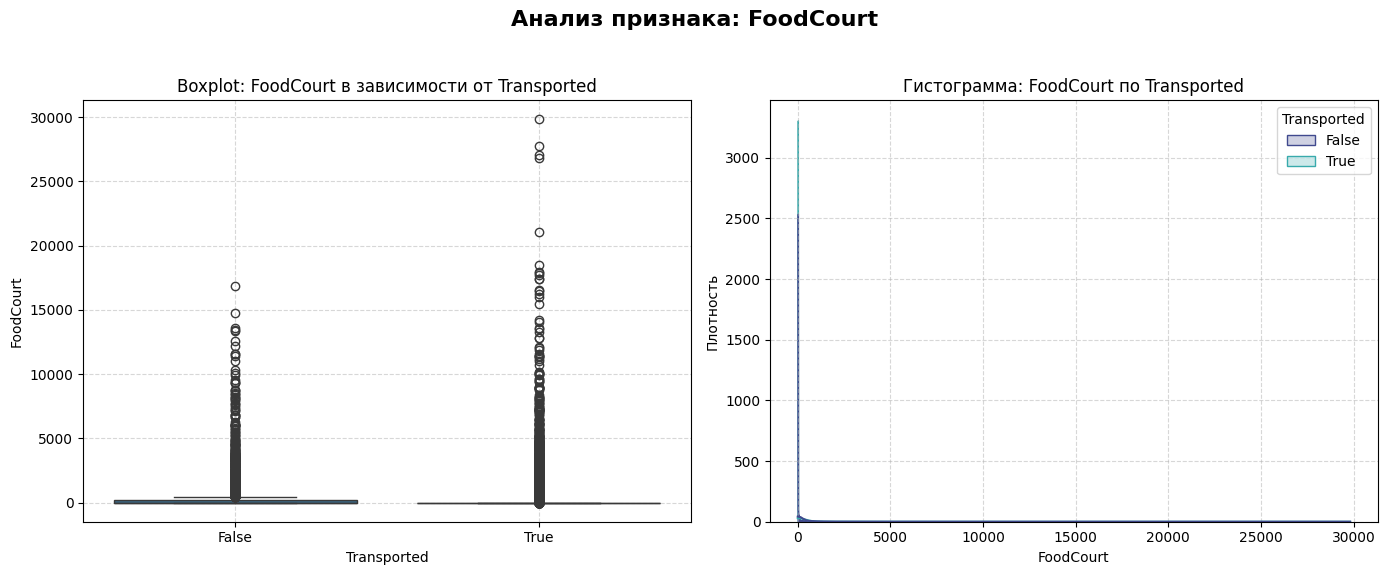

<ipython-input-30-5407c6dea9a5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x=target_variable, y=feature, data=dataframe, palette="viridis")


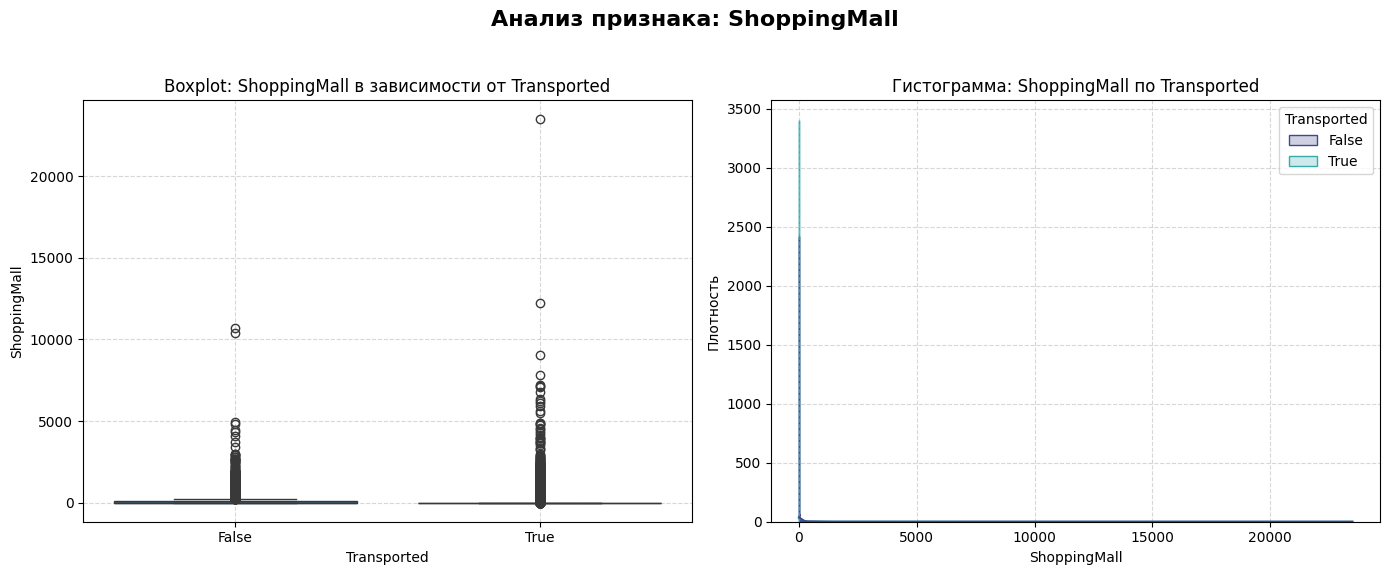

<ipython-input-30-5407c6dea9a5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x=target_variable, y=feature, data=dataframe, palette="viridis")


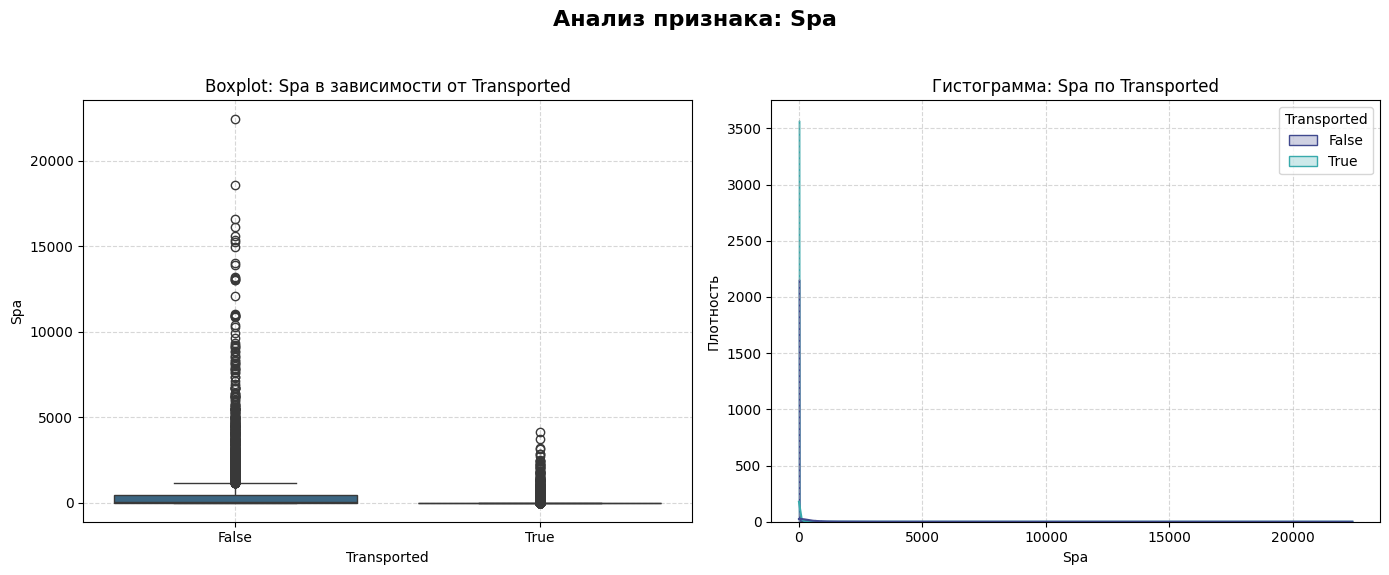

<ipython-input-30-5407c6dea9a5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x=target_variable, y=feature, data=dataframe, palette="viridis")


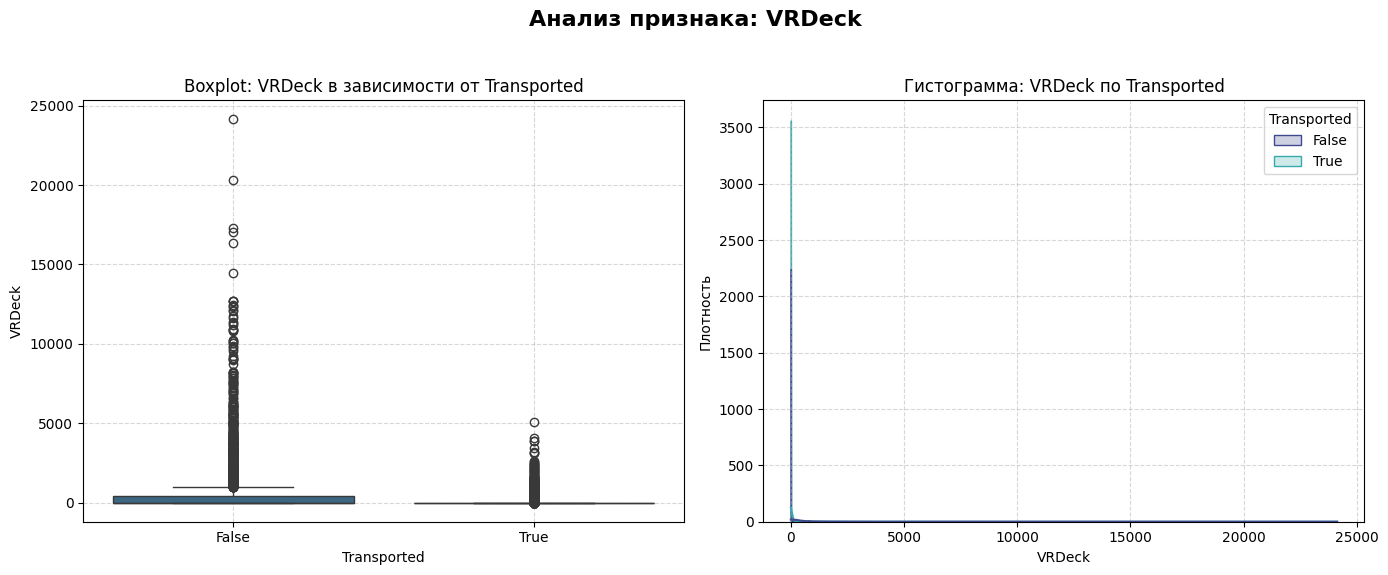

<ipython-input-30-5407c6dea9a5>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature_name, data=df, ax=ax1, linewidth=1.5, palette='pastel')


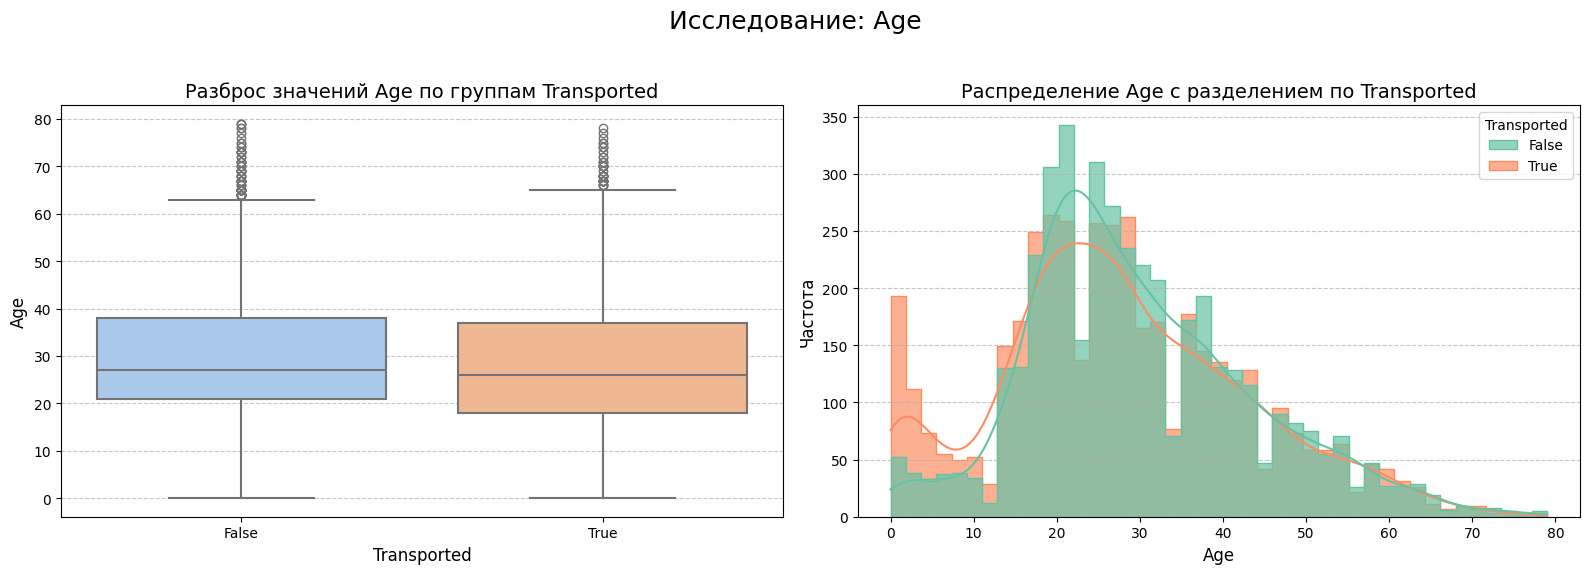

<ipython-input-30-5407c6dea9a5>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature_name, data=df, ax=ax1, linewidth=1.5, palette='pastel')


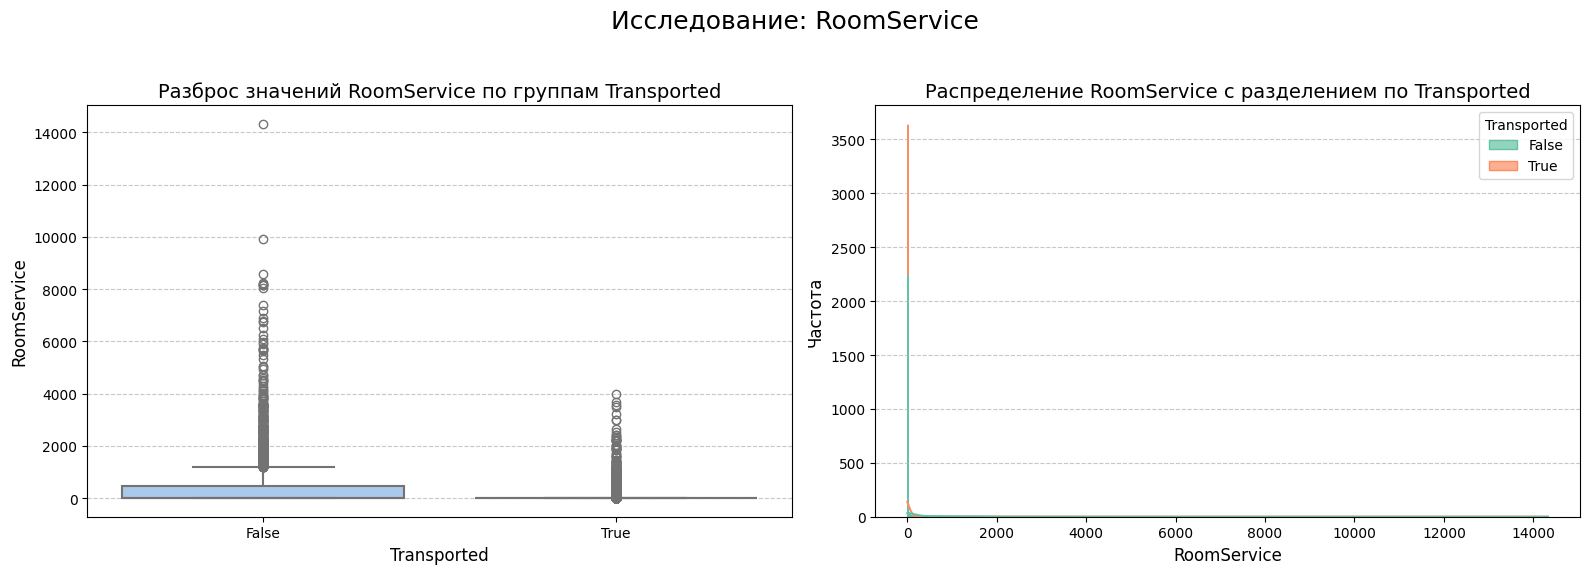

<ipython-input-30-5407c6dea9a5>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature_name, data=df, ax=ax1, linewidth=1.5, palette='pastel')


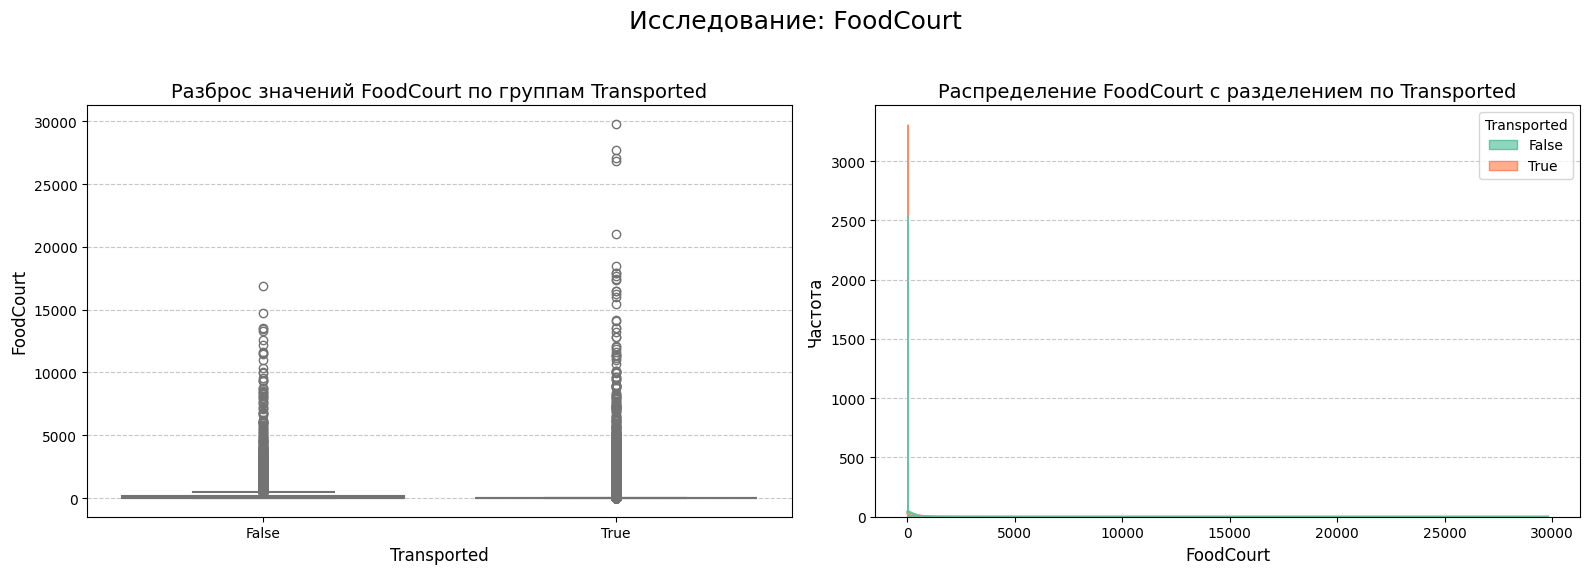

<ipython-input-30-5407c6dea9a5>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature_name, data=df, ax=ax1, linewidth=1.5, palette='pastel')


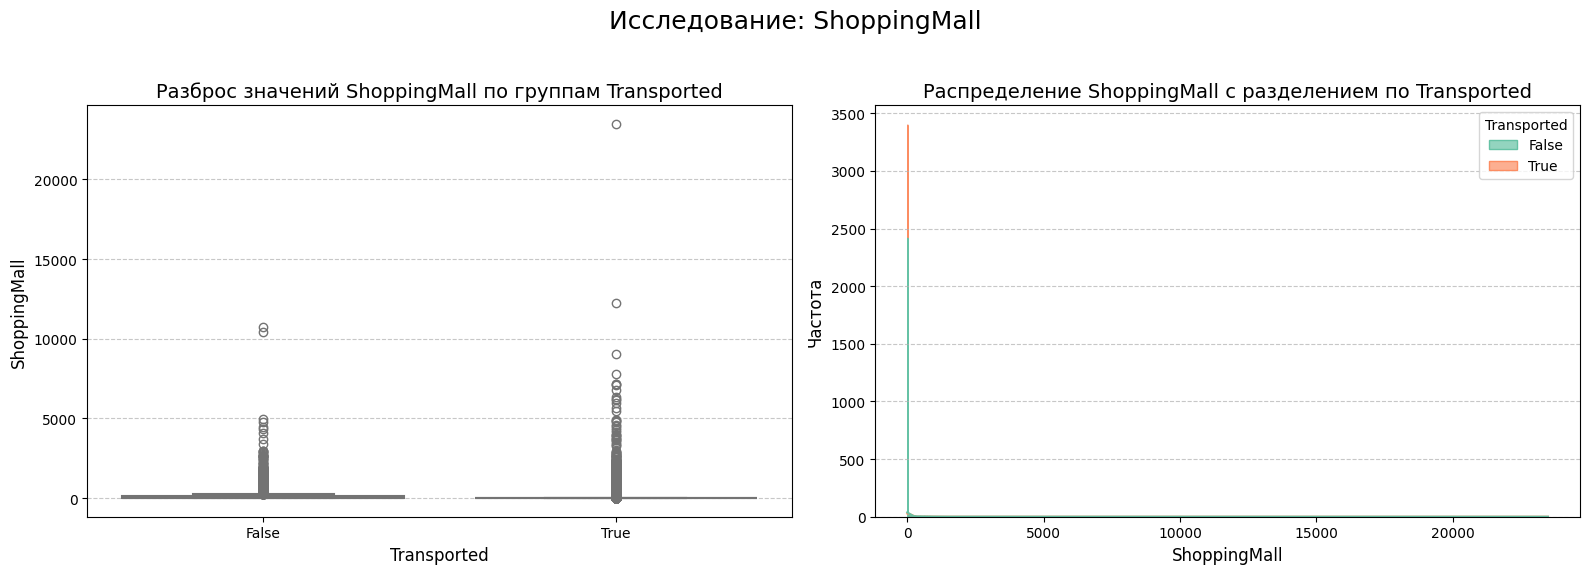

<ipython-input-30-5407c6dea9a5>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature_name, data=df, ax=ax1, linewidth=1.5, palette='pastel')


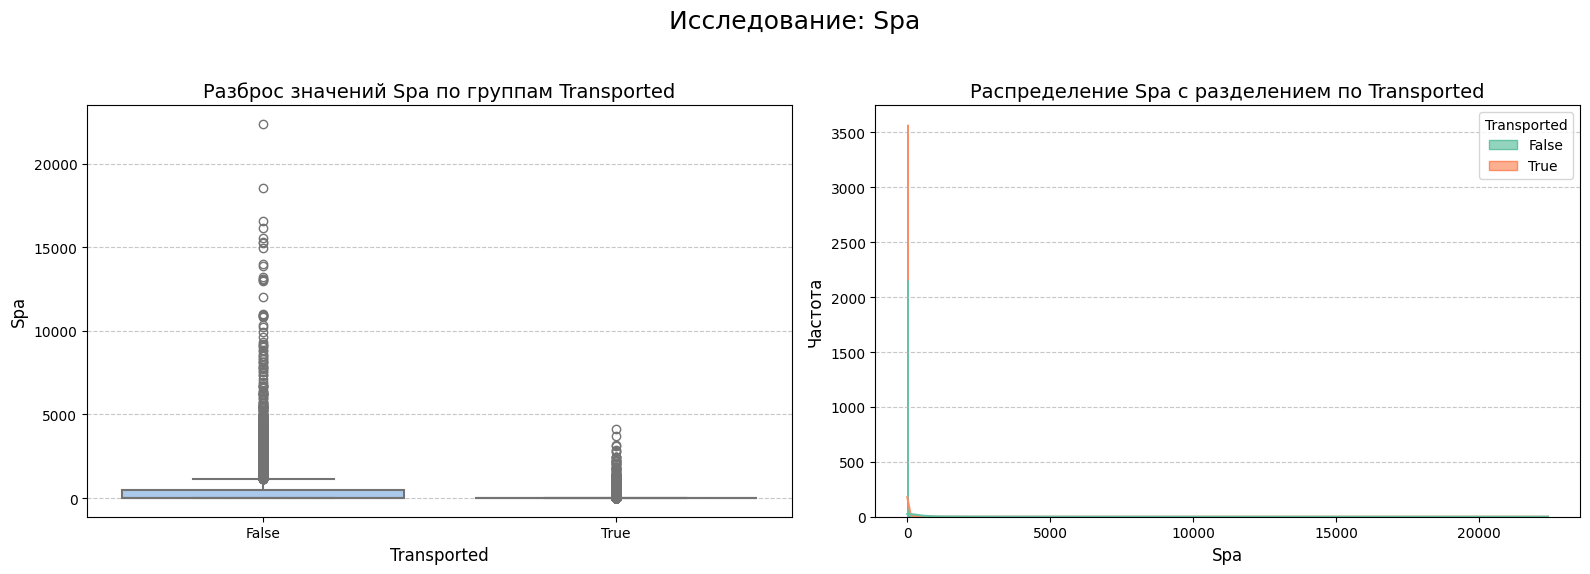

<ipython-input-30-5407c6dea9a5>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature_name, data=df, ax=ax1, linewidth=1.5, palette='pastel')


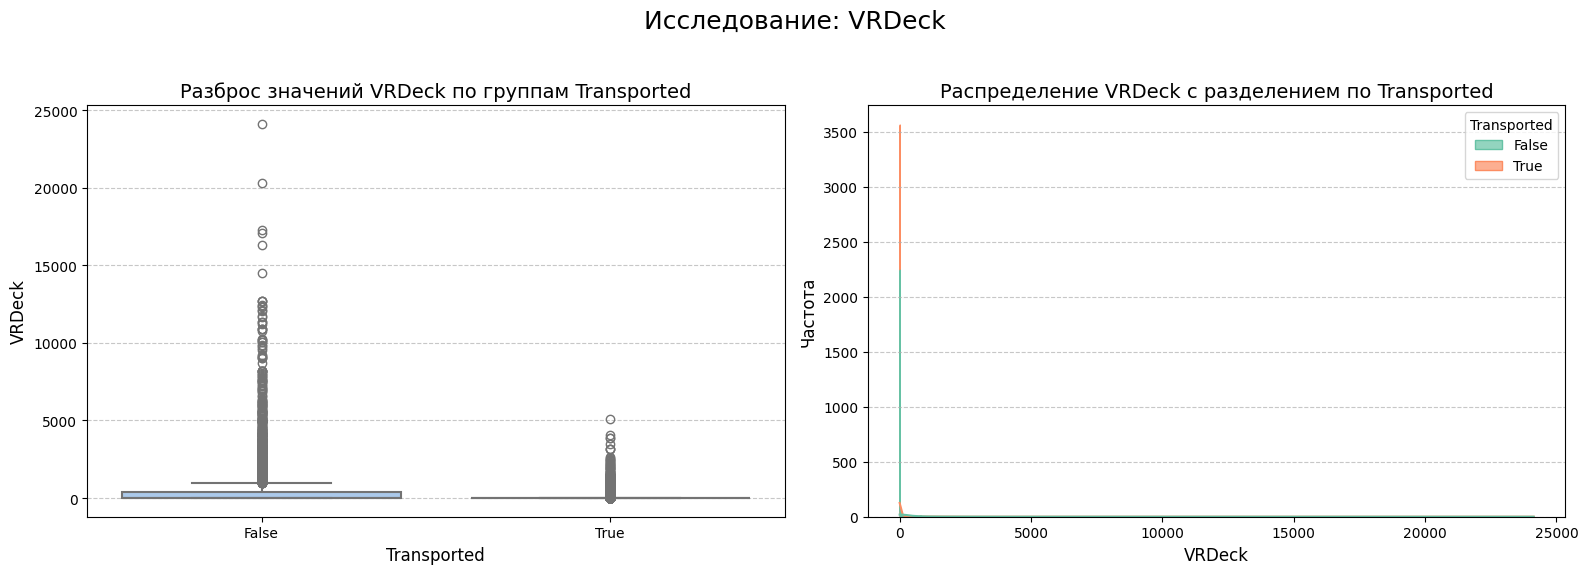

In [30]:
continuous_variables = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

def visualize_continuous_features(dataframe, features, target_variable):

    num_features = len(features)
    for i, feature in enumerate(features):

        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle(f'Анализ признака: {feature}', fontsize=16, fontweight='bold')

        sns.boxplot(ax=axes[0], x=target_variable, y=feature, data=dataframe, palette="viridis")
        axes[0].set_title(f'Boxplot: {feature} в зависимости от {target_variable}', fontsize=12)
        axes[0].set_xlabel(target_variable, fontsize=10)
        axes[0].set_ylabel(feature, fontsize=10)
        axes[0].grid(True, linestyle='--', alpha=0.5)

        sns.histplot(ax=axes[1], data=dataframe, x=feature, hue=target_variable, element="poly", kde=True, palette="mako")
        axes[1].set_title(f'Гистограмма: {feature} по {target_variable}', fontsize=12)
        axes[1].set_xlabel(feature, fontsize=10)
        axes[1].set_ylabel('Плотность', fontsize=10)
        axes[1].grid(True, linestyle='--', alpha=0.5)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

visualize_continuous_features(train_data, continuous_variables, 'Transported')

def demonstrate_data_insights(df, numeric_cols, target_col):

    for col in numeric_cols:
        create_feature_visualization(df, col, target_col)

def create_feature_visualization(df, feature_name, target):

     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
     fig.suptitle(f'Исследование: {feature_name}', fontsize=18)

     sns.boxplot(x=target, y=feature_name, data=df, ax=ax1, linewidth=1.5, palette='pastel')
     ax1.set_title(f'Разброс значений {feature_name} по группам {target}', fontsize=14)
     ax1.set_ylabel(feature_name, fontsize=12)
     ax1.set_xlabel(target, fontsize=12)
     ax1.tick_params(axis='both', labelsize=10)
     ax1.grid(axis='y', linestyle='--', alpha=0.7)

     sns.histplot(data=df, x=feature_name, hue=target, element="step", kde=True, fill=True, ax=ax2, palette='Set2', alpha=0.7)
     ax2.set_title(f'Распределение {feature_name} с разделением по {target}', fontsize=14)
     ax2.set_ylabel('Частота', fontsize=12)
     ax2.set_xlabel(feature_name, fontsize=12)
     ax2.tick_params(axis='both', labelsize=10)
     ax2.grid(axis='y', linestyle='--', alpha=0.7)

     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
     plt.show()

demonstrate_data_insights(train_data, continuous_variables, 'Transported')

#### Корреляционная матрица

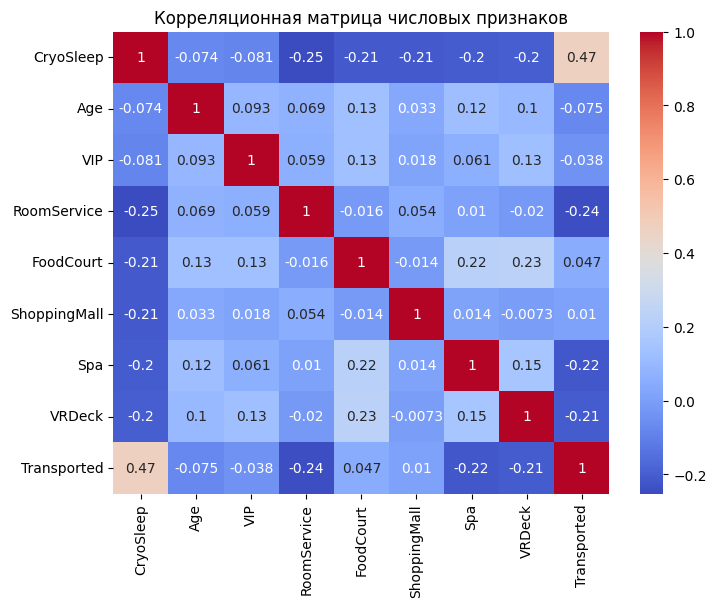

In [37]:
cat_columns = [col for col in train_data if isinstance(train_data[col][0], str)]
num_columns = [col for col in train_data if not isinstance(train_data[col][0], str)]
df = train_data[num_columns]

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

target_variable = 'Target'

#### Модели

RandomForestModel,
GradientBoostedTreesModel,
CartModel,
DistributedGradientBoostedTreesModel


In [38]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]